# Práctica 6

In [73]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot

In [2]:
url_root = "../P6 datos/"

## Ejercicio 1

In [3]:
url = url_root + "alfajores.txt"
df = pd.read_csv(url,delimiter=" ")

In [4]:
df.head()

,defectuosos,fabrica
1,3,1
2,3,1
3,3,1
4,1,0
5,4,1


### Pregunta A 

In [5]:
df[df.fabrica == 0].shape[0] / 500

0.256

### Pregunta B

In [6]:
df[(df.fabrica == 0) & (df.defectuosos == 3)].shape[0] / 500

0.018

### Pregunta C

In [7]:
data = []
for x in range(5):
    row = []
    for y in range(2):
        row.append(df[(df.fabrica == y) & (df.defectuosos == x)].shape[0] / 500)
    data.append(row)

In [8]:
probs = pd.DataFrame(data, columns = ["Quilmes","Pilar"])

In [9]:
probs.loc['Total'] = pd.Series(probs.sum())

In [10]:
probs["Total"] = probs.sum(axis=1)

In [11]:
probs

,Quilmes,Pilar,Total
0,0.096,0.004,0.100
1,0.090,0.034,0.124
2,0.052,0.166,0.218
3,0.018,0.288,0.306
4,0.000,0.252,0.252
Total,0.256,0.744,1.000


### Pregunta D

In [12]:
# Esperanza
espX = sum([x * probs.iloc[x,-1] for x in range(5)])        
espX

2.4859999999999998

In [13]:
# Varianza
ex2 = sum([x**2 * probs.iloc[x,-1] for x in range(5)])
ex2 - (espX**2)

1.6018040000000013

### Pregunta E

In [14]:
# Usando probs
inter = probs.iloc[3,0]
quilmes = probs.Quilmes.Total
inter / quilmes

0.0703125

### Pregunta F

In [15]:
X3 = probs.Total[3]
X3

0.306

### Pregunta G

In [16]:
inter / X3

0.058823529411764705

### Pregunta H

In [17]:
inter = probs.iloc[3,1]
pilar = probs.Pilar.Total
inter / pilar

0.3870967741935484

## Ejercicio 2

In [18]:
datos = [26.43,33.58,65.86,29.18,5.92,13.29,13.54,64.78,56.11,23.60,33.39,100.32,28.04,29.63,2.41,\
         3.17,11.99,6.47,23.56,17.96,32.27,2.09,57.43,15.31,42.85,1.68,49.61]

In [19]:
datos = np.array(datos)

### Pregunta A

In [20]:
(datos<30).mean()

0.6296296296296297

In [21]:
len(datos[datos<30])/len(datos)

0.6296296296296297

### Pregunta B

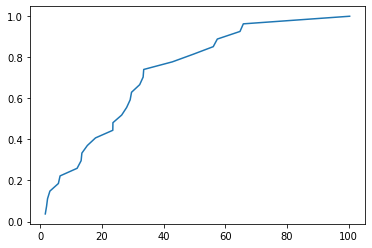

In [22]:
d = ECDF(datos)
plt.plot(d.x, d.y)

### Pregunta C

In [23]:
quantiles = np.quantile(datos,[0.1,0.9])
print("Estos datos permite estimar que el 90% de las lámparas producidas por esta fábrica dura más de {:.2f} horas \
y el 10% dura menos de {:.2f} horas".format(quantiles[0], quantiles[1]))

Estos datos permite estimar que el 90% de las lámparas producidas por esta fábrica dura más de 2.87 horas y el 10% dura menos de 60.37 horas


## Ejercicio 3

In [24]:
url = url_root + "graduados.txt"
df = pd.read_csv(url,delimiter=" ",header=None)
df.head()

,0
0,3.46
1,3.72
2,3.95
3,3.55
4,3.62


In [25]:
datos = np.array(df[0])

### Pregunta A

In [26]:
media = np.mean(datos)
media

3.720666666666667

In [27]:
np.median(datos)

3.72

### Pregunta B

In [28]:
sd = np.std(datos, ddof=1) # Ddof (Degrees of freedom): toma como divisor n - ddof. En nuestro caso el divisor es n-1
sd

0.1456716509313239

In [29]:
quantiles = np.quantile(datos,[0.25,0.75])
quantiles[1] - quantiles[0]

0.20000000000000018

### Pregunta C

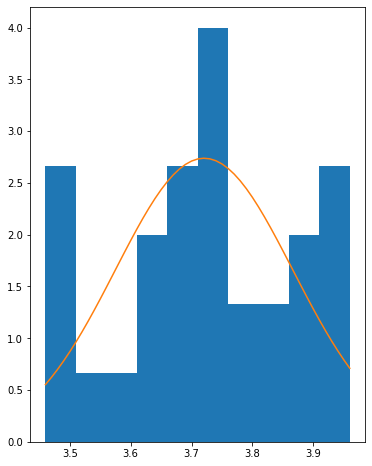

In [30]:
fig, ax = plt.subplots(figsize=(6,8))
ax.hist(datos,density=True)

va = scipy.stats.norm(loc = media, scale = sd)
x = np.arange(min(datos),max(datos)+0.01,0.01)
ax.plot(x,va.pdf(x))

### Pregunta D

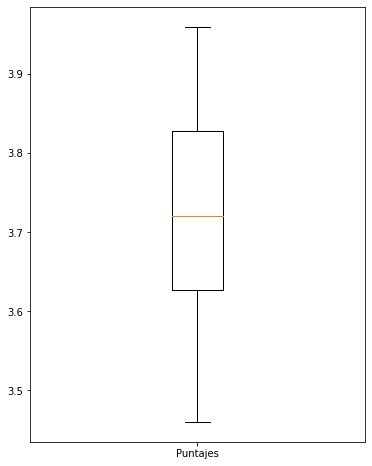

In [32]:
fig, ax = plt.subplots(figsize=(6,8))
ax.boxplot(datos,labels=["Puntajes"])
plt.show()

### Pregunta E

Parece que tienen una distribución normal

## Ejercicio 4

In [33]:
url = url_root + "ciudades.txt"
df = pd.read_csv(url, delim_whitespace=True)
df.head()

,Argentina,EEUU,Holanda,Japon
0,29.66,77.81,8.68,110.21
1,7.61,35.50,7.31,32.14
2,6.35,24.79,6.02,18.88
3,4.10,20.02,2.64,16.38
4,3.80,16.70,1.75,13.37


### Pregunta A

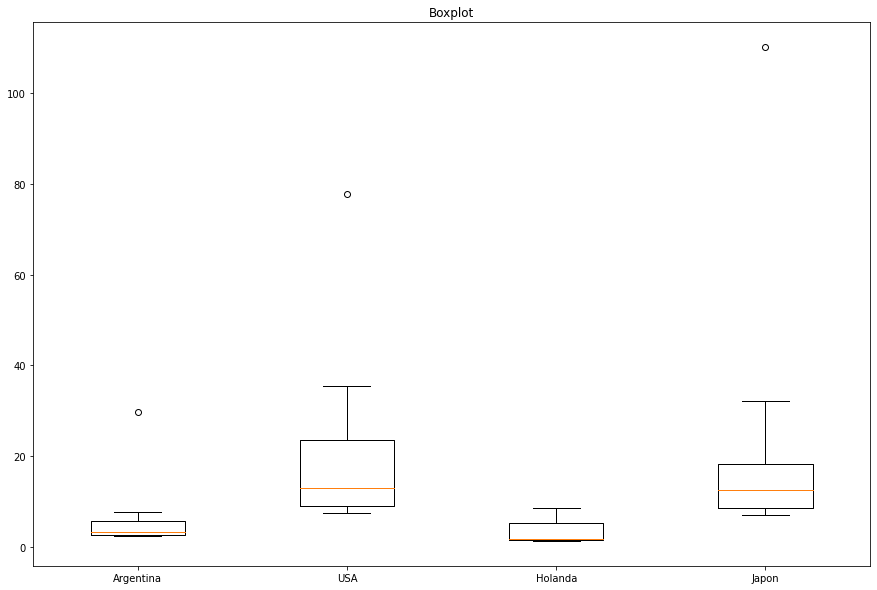

In [34]:
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.set_title('Boxplot')
ax1.boxplot(df,labels=["Argentina","USA","Holanda","Japon"])
plt.show()

### Pregunta B

Holanda es el más homogéneo.

## Ejercicio 5

In [42]:
url = url_root + "ingresos.txt"
df = pd.read_csv(url, header=None)
df.head()

,0
0,15.0
1,15.0
2,15.0
3,15.0
4,15.0


In [43]:
df = df[0]

In [46]:
datos = np.array(df)

### Pregunta A

In [48]:
# Salario mínimo
datos.min()

15.0

In [54]:
(datos == datos.min()).mean()

0.461

### Pregunta B

In [55]:
np.quantile(datos,0.9)

240.54083000000008

### Pregunta C

In [57]:
np.mean(datos)

87.17647991

In [59]:
np.median(datos)

18.473715

In [61]:
# quita de ambas punta el proportiontocut de los datos
scipy.stats.trim_mean(datos,proportiontocut = 0.1)

49.9308686375

### Pregunta D

In [62]:
np.std(datos,ddof=1)

152.0336284840572

In [63]:
quants = np.quantile(datos,[0.25,0.75])
IQR = quants[1] - quants[0]
IQR

74.97330249999999

### Pregunta E

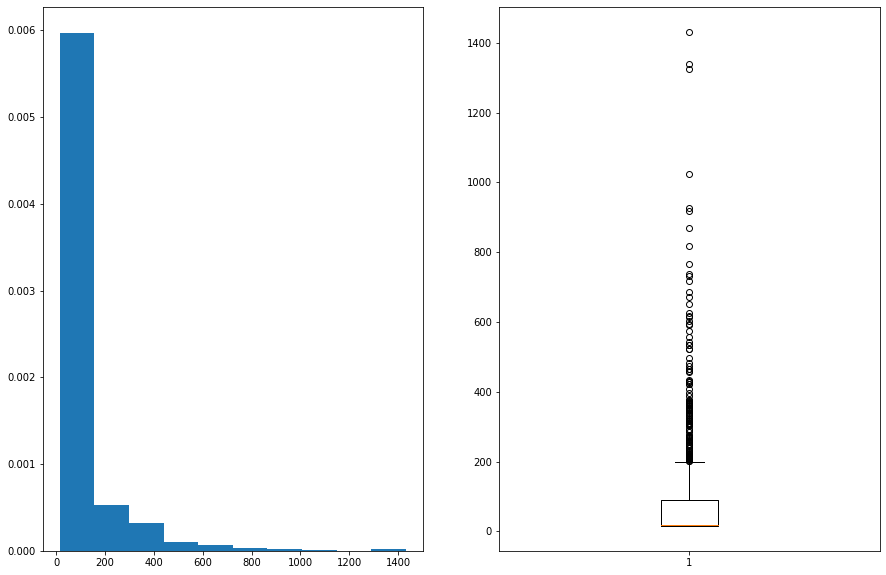

In [71]:
fig, axs = plt.subplots(1,2,figsize=(15,10))
axs[0].hist(datos,density=True)
axs[1].boxplot(datos)
plt.show()

Hay mucha concentración de datos en valores bajos. El boxplot muestra que el 75% de los datos está entre 0 y 100 aprox, lo que provoca que muchos datos caigan en zonas de outliers.

### Pregunta F

No

### Pregunta G

La media da 87.17 vs la mediana 18.47. La mediana parece ser una medida mas acertada de centralidad pues la media está condicionada por los valores extremos de los datos.

## Ejercicio 6

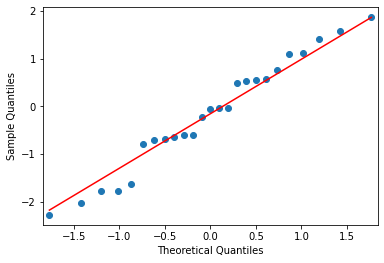

In [85]:
sample = scipy.stats.norm.rvs(size=25)
qqplot(sample,line="s")
plt.show()

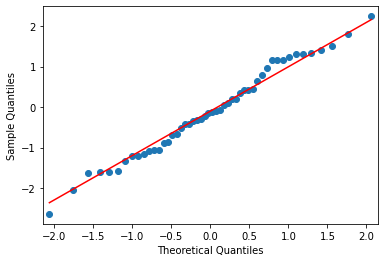

In [86]:
sample = scipy.stats.norm.rvs(size=50)
qqplot(sample,line="s")
plt.show()

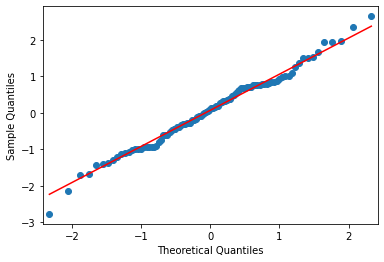

In [87]:
sample = scipy.stats.norm.rvs(size=100)
qqplot(sample,line="s")
plt.show()

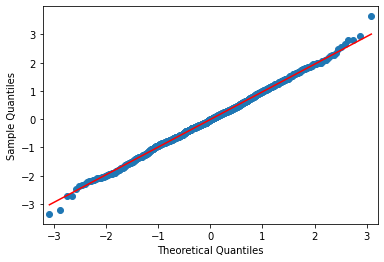

In [89]:
sample = scipy.stats.norm.rvs(size=1000)
qqplot(sample,line="s")
plt.show()